<a href="https://colab.research.google.com/github/emashu001/Python_Quest/blob/master/Boston_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                     test_size=0.2)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(323, 13)
(81, 13)
(323,)
(81,)


In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1])))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
11/11 [==============================] - 1s 16ms/step - loss: 531.5259 - mae: 21.5307 - val_loss: 674.9857 - val_mae: 23.3434
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 485.0727 - mae: 20.5203 - val_loss: 618.1936 - val_mae: 22.2226
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 428.3427 - mae: 19.2002 - val_loss: 542.8637 - val_mae: 20.6306
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 352.7614 - mae: 17.2729 - val_loss: 447.2119 - val_mae: 18.3638
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 262.2271 - mae: 14.6226 - val_loss: 337.2582 - val_mae: 15.4246
Epoch 6/30
11/11 [==============================] - 0s 3ms/step - loss: 172.8539 - mae: 11.3050 - val_loss: 235.0231 - val_mae: 11.9183
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 106.0497 - mae: 8.3779 - val_loss: 166.6556 - val_mae: 9.2917
Epoch 8/30
11/11 [==============================]

<ipython-input-7-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


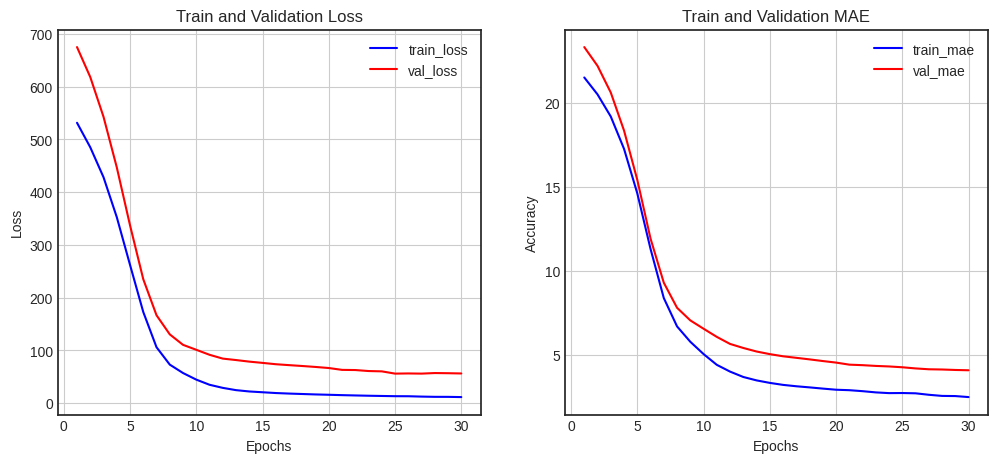

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 20.1805 - mae: 3.4032


[20.1805419921875, 3.4031927585601807]